In [96]:
import glob
from PIL import Image, ImageFont, ImageDraw
import os
import fnmatch
import matplotlib
import random
from matplotlib import pyplot as plt
from pathlib import Path
import matplotlib.image as mpimg
import numpy as np
import re
import cv2
import itertools
%matplotlib inline

## List of fonts

In [12]:
fonts_list = []
for root, dirnames, filenames in os.walk('./fonts_new/'):
    for filename in fnmatch.filter(filenames, '*.ttf'):
        fonts_list.append(os.path.join(root, filename))


## List of words

In [13]:
word_list = []
f = open('balanced_words.txt','rb')
lines = f.readlines()
f.close()
for line in lines:
    word = re.sub(r'[^a-zA-Z]','',line)
    word_list.append(word.lower())


## Word images in different fonts

In [10]:
background_images = []
for i in range(1, 6):
    my_file = Path('./map_textures/map_crop_0' + str(i) + '.jpg')
    if my_file.is_file():
        img = mpimg.imread('./map_textures/map_crop_0' + str(i) + '.jpg')
        background_images.append(img)

def changeCase(word):
    case = random.randint(0, 2)

    # Explicitly getting capital words. Uncomment following line to get all types.
    case = 2

    if case == 0:
        # get lowercase word
        return word.lower()
    elif case == 1:
        # get camelcase word
        return word[0].upper() + word[1:]
    else:
        # get uppercase word
        return word.upper()

    
def get_random_crop():
    image_number = random.randint(1, 1)
    img = background_images[image_number - 1]
    # print(img.shape)
    height, width = img.shape[0], img.shape[1]
    start_row = random.randint(0, height - 227)
    start_column = random.randint(0, width - 227)
    new_img = img[start_row:start_row + 227, start_column:start_column + 227, :]
    new_img = new_img[..., list(list(itertools.permutations([0, 1, 2]))[random.randint(0, 5)])]
    # print new_img.shape
    return new_img

def getImageFromWord(word):
    word = changeCase(word)

    W, H = (227,227)
    #word = word_list[random.randint(0,len(word_list)-1)]
    for font_name in fonts_list:
        fontsize = 2
        img_fraction = 0.75
        font = ImageFont.truetype(font_name, fontsize)
        image = Image.new("RGBA",(W,H),"white")
        while font.getsize(word)[0] < img_fraction*image.size[0]:
            # iterate until the text size is just larger than the criteria
            fontsize += 1
            font = ImageFont.truetype(font_name, fontsize)

    draw = ImageDraw.Draw(image)
    w, h = font.getsize(word)
    draw.text((10,10), word, font=font, fill="black")
    image = image.crop((0,10,w+20,h+20))
    plt.imshow(image)
    plt.show()
    rotateFlag = random.randint(0, 1)
    if rotateFlag:
        rotateAngle = random.randint(-10, 10)
        M = cv2.getRotationMatrix2D((width / 2, height / 2), rotateAngle, 1)
        img = cv2.warpAffine(img, M, (width, height), borderValue=(255, 255, 255))

    affineFlag = random.randint(0, 1)
    if affineFlag:
        pts1 = np.float32([[10, 10], [200, 50], [50, 200]])
        pts2 = np.float32([[10 + random.randint(-20, 20), 30 + random.randint(-20, 20)]
                              , [200, 50],
                           [50 + random.randint(-20, 20), 200 + random.randint(-20, 20)]])

        M = cv2.getAffineTransform(pts1, pts2)
        img = cv2.warpAffine(img, M, (width, height), borderValue=(255, 255, 255))

    img = cv2.resize(img, (227, 227))
    bg_image = get_random_crop()
    bg_image = cv2.resize(bg_image, (227, 227))
    bg_image = merge_background_text(img, bg_image)
    # print(bg_image.shape)
    # img = np.add(img,bg_image)
    # plt.imshow(img)
    # print img.shape


    gray = cv2.cvtColor(bg_image, cv2.COLOR_BGR2GRAY)
    ret, thresh1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
    # print(bg_image.shape)
    new_img = np.zeros((227, 227, 3), np.uint8)
    new_img[:, :, :] = 255
    for i in range(new_img.shape[0]):
        for j in range(new_img.shape[1]):
            if thresh1[i, j] == 255:
                new_img[i, j, :] = 0
    return np.copy(new_img), np.copy(bg_image)

(37, 185)
(74, 370, 3)


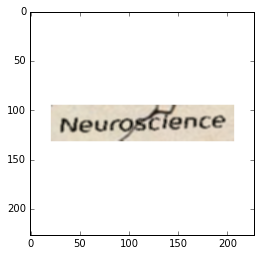

In [176]:
background_images = []
for i in range(1, 6):
    my_file = Path('./map_textures/map_crop_0' + str(i) + '.jpg')
    if my_file.is_file():
        img = mpimg.imread('./map_textures/map_crop_0' + str(i) + '.jpg')
        background_images.append(img)

def get_random_crop(size):
    print size
    image_number = random.randint(0, len(background_images)-1)
    img = background_images[image_number]
    # print(img.shape)
    height, width = img.shape[0], img.shape[1]
    start_row = random.randint(0, height - size[0]*2)
    start_column = random.randint(0, width - size[1]*2)
    new_img = img[start_row:start_row + size[0]*2, start_column:start_column + size[1]*2, :]
    new_img = new_img[..., list(list(itertools.permutations([0, 1, 2]))[random.randint(0, 5)])]
    print new_img.shape
    result = cv2.resize(new_img,(size[1],size[0]))
    return result

def changeCase(word):
    case = random.randint(1, 2)

    # Explicitly getting capital words. Uncomment following line to get all types.

    if case == 0:
        # get lowercase word
        return word.lower()
    elif case == 1:
        # get camelcase word
        return word[0].upper() + word[1:]
    else:
        # get uppercase word
        return word.upper()
    
def merge_background_text(img, bg_image):
    (r,g,b) = (random.randint(0,20),random.randint(0,20),random.randint(0,20))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i, j] != 255:
                if random.random()<0.95:
                    bg_image[i, j, 0] = r
                    bg_image[i, j, 1] = g
                    bg_image[i, j, 2] = b
    kernel = np.ones((3,3),np.float32)/9
    bg_image = cv2.filter2D(bg_image,-1,kernel)
#     bg_image = cv2.resize(bg_image, (227,227))
    return bg_image

def get_word_image(word):
    W, H = (227,227)
    #word = word_list[random.randint(0,len(word_list)-1)]
    word = changeCase(word)
    font_name = fonts_list[random.randint(0,len(fonts_list)-1)]
    fontsize = 2
    img_fraction = 0.75
    font = ImageFont.truetype(font_name, fontsize)
    image = Image.new("L",(W,H),"white")
    while font.getsize(word)[0] < img_fraction*image.size[0]:
        # iterate until the text size is just larger than the criteria
        fontsize += 1
        font = ImageFont.truetype(font_name, fontsize)

    draw = ImageDraw.Draw(image)
    w, h = font.getsize(word)
    draw.text((W/2 - w/2,H/2-h/2), word, font=font, fill="black")
#     image = image.crop((0,10,w+20,h+20))
    return image

def pad_image(img):
    (W,H) = (227, 227)
    (h, w) = (img.shape[0], img.shape[1])
    constant= cv2.copyMakeBorder(img,(H-h)/2, (H - (h+(H-h)/2)),(W-w)/2,(W - (w+(W-w)/2)),cv2.BORDER_CONSTANT,value=(255,255,255))
    return constant
    
    
    
def transform_image(img):
    W, H = (512,512)
#     img = cv2.resize(img, (W, H))
    width,height = (512,512)
    rotateFlag = random.randint(0, 1)
    if rotateFlag:
        rotateAngle = random.randint(-10, 10)
        M = cv2.getRotationMatrix2D((width / 2, height / 2), rotateAngle, 1)
        img = cv2.warpAffine(img, M, (width, height), borderValue=(255, 255, 255))

    affineFlag = random.randint(0, 1)
    if affineFlag:
        pts1 = np.float32([[10, 10], [200, 50], [50, 200]])
        pts2 = np.float32([[10 + random.randint(-20, 20), 30 + random.randint(-20, 20)]
                              , [200, 50],
                           [50 + random.randint(-20, 20), 200 + random.randint(-20, 20)]])

        M = cv2.getAffineTransform(pts1, pts2)
        img = cv2.warpAffine(img, M, (width, height), borderValue=(255, 255, 255))
    min_row = H
    max_row = 0
    min_col = W
    max_col = 0
    ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

    for i in range(thresh1.shape[0]):
        for j in range(thresh1.shape[1]):
            if thresh1[i][j]==0:
                if i<min_row:
                    min_row = i
                if i>max_row:
                    max_row = i
                if j < min_col:
                    min_col = j
                if j > max_col:
                    max_col = j
    
    thresh1 = thresh1[min_row-10:max_row+10, min_col-10:max_col+10]
    
    return thresh1


def get_color_text_image(word):
    try:
        img = np.array(get_word_image(word))
        img = transform_image(img)
        bg_image = get_random_crop(img.shape)
        result = merge_background_text(img, bg_image)
        padded_result = pad_image(result)
    except Exception as e:
        print e
        return False
    return padded_result



In [132]:
random.random()

0.23925848529471894

In [179]:
d = {chr(i):0 for i in range(97,97+26)}
for word in word_list:
    word = word.lower()
    for ch in word:
        d[ch]+=1
print d

{'a': 697, 'c': 333, 'b': 139, 'e': 960, 'd': 246, 'g': 207, 'f': 102, 'i': 779, 'h': 204, 'k': 107, 'j': 43, 'm': 235, 'l': 418, 'o': 616, 'n': 658, 'q': 48, 'p': 209, 's': 550, 'r': 596, 'u': 341, 't': 593, 'w': 93, 'v': 106, 'y': 185, 'x': 72, 'z': 80}
